A C -> B

In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit_aer.primitives import SamplerV2 as sampler
from qiskit.visualization import plot_histogram

In [ ]:
# Circuito para medir V

def param(h,k):
    return (h*k)/np.sqrt((h**2+2*k**2)**2+(h*k)**2)


# Define the parameters

def qc_V(h,k):

    qr = QuantumRegister(3)
    qc = QuantumCircuit(qr)
    
    #Prepare the ground state
    theta = -np.arcsin((1/np.sqrt(2))*(np.sqrt(1+h/np.sqrt(h**2+k**2))))

    qc.x(qr[0])
    qc.ry(2*theta,qr[0])
    qc.cx(qr[0],qr[1])
    qc.cx(qr[0],qr[2])
    qc.x(qr[0])
    qc.ry(2*theta,qr[1])
    qc.cx(qr[0],qr[1])
    qc.barrier()

    # Alice's projective measurement
    qc.h(qr[0])
    qc.barrier()

    #Bob's conditional operation on A
    phi = 0.5*np.arcsin(param(h,k))
    qc.cry(-2*phi,qr[0],qr[2])

    qc.x(qr[0])
    qc.cry(2*phi,qr[0],qr[2])
    qc.x(qr[0])

    #Bob's conditional operation on A
    qc.cry(-2*phi,qr[1],qr[2])
    qc.x(qr[1])
    qc.cry(2*phi,qr[1],qr[2])
    qc.x(qr[1])


    #Measurement of the interaction V
    qc.h(qr[1])
    qc.measure_all()

    return qc

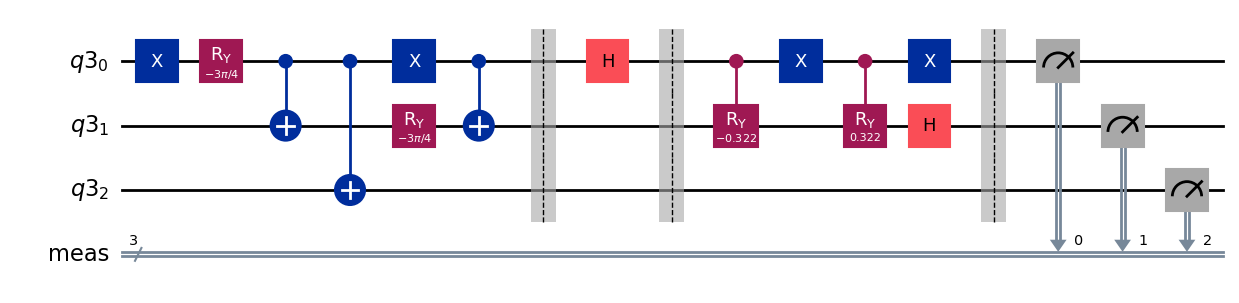

In [9]:
qc = qc_V(1, 1)
qc.draw('mpl')